# My Recommender

## Data Retrieval & Preprocessing

In [1]:
# Importing Libraries

import zipfile
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# Fetching data files
!wget 'http://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip'


# Unzipping Data
with zipfile.ZipFile(f'jester_dataset_1_1.zip',"r") as zip_ref:
  zip_ref.extractall()

--2021-04-14 22:30:34--  http://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip
Resolving eigentaste.berkeley.edu (eigentaste.berkeley.edu)... 128.32.192.72
Connecting to eigentaste.berkeley.edu (eigentaste.berkeley.edu)|128.32.192.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4171628 (4.0M) [application/zip]
Saving to: ‘jester_dataset_1_1.zip.1’

jester_dataset_1_1. 100%[===================>]   3.98M  7.08MB/s    in 0.6s    

2021-04-14 22:30:34 (7.08 MB/s) - ‘jester_dataset_1_1.zip.1’ saved [4171628/4171628]



In [3]:
# Creating DataFrame

data = pd.read_excel('/content/jester-data-1.xls', header=None, na_values=99)
data.drop(columns=0, inplace=True)
data.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
# Checking Shape of data

data.shape

(24983, 100)

In [5]:
# Finding Average Rating for Jokes

score = []
for i in data.columns:
  score.append(np.nanmean(data.loc[:,i]))


#### Best & Worst Jokes

In [6]:
# Finding Best and Worst Jokes

rdict = {'JokeID':data.columns, 'Avg_Rating':score}
rating = pd.DataFrame.from_dict(rdict)
rating.sort_values(by='Avg_Rating', ascending=False, inplace=True)
print(f'Best Joke:\n {rating.head(1)}')
print(f'Worst Joke:\n {rating.tail(1)}')

Best Joke:
     JokeID  Avg_Rating
49      50    3.665085
Worst Joke:
     JokeID  Avg_Rating
57      58    -3.83388


In [7]:
# Rating for Joke 10 by 18109

data.iloc[18109,10]

2.62

In [8]:
# Creating np.array object of data

arr = data.values
arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

#### Helper Function Setup and Data Preparation

In [9]:
# Helper Function Setup

def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with np.NaN's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=np.NaN)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [10]:
new_arr, idx = replace(arr, 0.1)

## Latent Factor Models for Collaborative Filtering

In [11]:
# Creating latent factors

n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [12]:
latent_item_features

array([[0.4094159 , 0.62852476],
       [0.07120132, 0.88942858],
       [0.21698733, 0.32412149],
       [0.83308464, 0.07961143],
       [0.91706128, 0.52858701],
       [0.28826618, 0.06044797],
       [0.73113451, 0.07952145],
       [0.29516544, 0.63837288],
       [0.56405312, 0.30917593],
       [0.97966092, 0.98295973],
       [0.3241505 , 0.48144864],
       [0.11439208, 0.10061119],
       [0.28442876, 0.8802526 ],
       [0.61022218, 0.80571982],
       [0.16445147, 0.09152019],
       [0.3674529 , 0.91238518],
       [0.18998751, 0.49712515],
       [0.35692558, 0.68224759],
       [0.72942313, 0.30156649],
       [0.51301815, 0.10514185],
       [0.5368896 , 0.20310321],
       [0.96291084, 0.00487859],
       [0.1214325 , 0.05429052],
       [0.53722488, 0.01368231],
       [0.73002761, 0.84593489],
       [0.35847763, 0.23195277],
       [0.04017199, 0.88992181],
       [0.10546056, 0.03179471],
       [0.60542877, 0.23268539],
       [0.59034942, 0.54546161],
       [0.

In [13]:
latent_user_preferences

array([[0.03049423, 0.39401634],
       [0.65703017, 0.56428102],
       [0.21564571, 0.79431626],
       ...,
       [0.78541094, 0.97574371],
       [0.71994165, 0.30277767],
       [0.12620406, 0.58765634]])

In [14]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating != 99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/100:	MSE=26.213198
Iteration 10/100:	MSE=23.281801
Iteration 20/100:	MSE=21.489462
Iteration 30/100:	MSE=19.920828
Iteration 40/100:	MSE=17.795003
Iteration 50/100:	MSE=17.245077
Iteration 60/100:	MSE=17.127123
Iteration 70/100:	MSE=17.089971
Iteration 80/100:	MSE=17.076930
Iteration 90/100:	MSE=17.072307


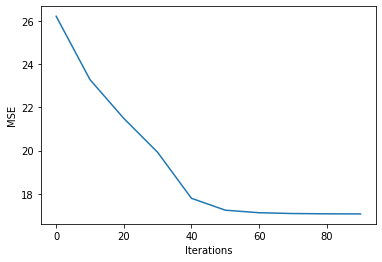

In [15]:
# Calculating MSE

num_iter = 100
hist = sgd(num_iter)
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [16]:
# Making Prediction for test set

predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.85315645, -4.09264215, -5.68297913, ..., -2.38333292,
        -6.09006589, -2.43585109],
       [ 2.97242751,  3.14201088,  3.77592477, ...,  2.57160219,
         3.85700899,  2.78695717],
       [ 7.26713401,  7.65313967,  8.08457457, ...,  7.66986989,
         7.84340358,  8.52617512],
       ...,
       [-1.06684482, -1.12842771, -1.38398985, ..., -0.88831434,
        -1.42410958, -0.9573391 ],
       [-1.57280688, -1.67330495, -2.42973146, ..., -0.84022109,
        -2.6380456 , -0.83002542],
       [ 2.54506663,  2.66618039,  2.26701189, ...,  3.36641694,
         1.96635379,  3.82857284]])

In [17]:
# Creating DataFrame for Comparison

values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [18]:
# Data Comparison 

comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.8531564479397127)","(8.79, -4.092642150556029)","(-9.66, -5.682979127361817)","(-8.16, -9.641893085519078)","(-7.52, -2.6247544294448892)","(-8.5, -1.5389775198065296)","(-9.85, -4.938519165771186)","(4.17, -4.401413366985182)","(-8.98, -8.914346467630239)","(-4.76, -3.629846465231353)","(-8.5, -1.4431700525144804)","(-6.75, -1.590483741232373)","(-7.18, -6.6911576241264745)","(8.45, -1.3807410798133086)","(-7.18, -6.72091395823389)","(-7.52, -10.314132492011298)","(-7.43, -4.506116852656842)","(-9.81, -5.395758571317607)","(-9.85, -3.8506801903301686)","(-9.85, -6.250424334443979)","(-9.37, 0.6558924039438649)","(1.5, -4.210776436909626)","(-4.37, -6.065014169203611)","(-9.81, -10.657481609012628)","(-8.5, -4.572663250154536)","(1.12, -1.4454017668620385)","(7.82, 3.702349522232325)","(2.86, -1.520746325879835)","(9.13, 3.8206789502505587)","(-7.43, -7.952597193655936)","(2.14, 1.3069815124655364)","(99.0, 3.5809338289189276)","(-9.08, -9.554623178806397)","(7.82, -2.6364017795784265)","(5.05, 3.118052049337405)","(4.95, 3.9562029719261846)","(-9.17, -9.244532032860565)","(-8.4, -3.353890239536037)","(-8.4, -2.3761119846473937)","(-8.4, -3.573276366807771)",...,"(8.59, 1.5045226672057703)","(3.59, 2.441055796065357)","(-6.84, -5.347106423300399)","(-9.03, -8.34122263082624)","(2.82, 1.588616004272071)","(-1.36, 1.7871620077377628)","(-9.08, -8.876438662443537)","(8.3, 2.0059087279967875)","(5.68, 2.037929078384845)","(-4.81, -4.599326955498744)","(nan, -7.012869470644955)","(nan, 1.3910546582661663)","(nan, -3.3130780329471716)","(nan, -9.242009842806192)","(nan, -5.9818470614344035)","(nan, 0.7732442351656061)","(nan, -4.162558105425696)","(-9.42, -2.0812419637706414)","(nan, -5.379969679692509)","(nan, -2.5488706492505377)","(nan, -1.2139499990358007)","(-7.72, -4.588034837977455)","(99.0, -0.11010380814573126)","(nan, -4.649224828870008)","(99.0, -4.06178768190022)","(nan, -6.250286039133175)","(nan, -0.9221106675384108)","(nan, -1.0987755660948881)","(nan, 3.5004257550278135)","(nan, -5.2729359657177275)","(2.82, -1.2293432249138732)","(nan, -3.0861142565989694)","(nan, 0.4616952048447639)","(nan, -4.745712352208346)","(99.0, -3.831641829097711)","(nan, -2.704184893440547)","(-5.63, -1.9730831334337213)","(nan, -2.383332920213669)","(nan, -6.0900658939110945)","(nan, -2.4358510948901766)"
1,"(4.08, 2.9724275061373464)","(99.0, 3.1420108790301855)","(6.36, 3.775924765425502)","(4.37, 5.139358201351228)","(-2.38, 2.22495615664083)","(-9.66, 2.541405490392249)","(-0.73, 2.921286616773591)","(-5.34, 2.2849597494696825)","(8.88, 4.973742203726195)","(9.22, 2.980603426366871)","(6.75, 2.4435243421096366)","(8.64, 2.6311817903642)","(4.42, 3.0784785580568244)","(7.43, 2.5383831493996025)","(4.56, 2.9146194462420065)","(-0.97, 4.159577924453269)","(4.66, 2.408330819394918)","(-0.68, 2.911501230984163)","(3.3, 2.7348600643152547)","(-1.21, 3.5520482896894334)","(0.87, 1.7082742598172196)","(8.64, 3.4884159235974272)","(8.35, 3.9588522835737523)","(9.17, 5.346878995641014)","(0.05, 3.535868343253933)","(7.57, 2.504154385879161)","(4.71, 0.3890431075510605)","(99.0, 2.449092240695577)","(-0.39, 0.23671136593253417)","(6.99, 4.78981625709081)","(6.5, 1.387110701615027)","(-0.92, 0.4496494831813862)","(7.14, 5.104830923126988)","(99.0, 2.834601048606434)","(-1.8, 0.66263203600203)","(0.73, 0.2069157537002894)","(7.09, 4.735582394902721)","(3.4, 3.080370467131568)","(-0.87, 2.8357399501753324)","(7.91, 3.2252288290873685)",...,"(-6.7, 1.4016817272793598)","(99.0, 0.9845322126350013)","(-9.03, 3.7453646380193186)","(4.47, 4.60514010971134)","(4.08, 1.2683315660374725)","(-3.83, 1.1822572687176305)","(8.74, 4.847831470437245)","(1.12, 1.0543583714550078)","(0.78, 1.122444765028324)","(99.0, 

In [19]:
# Data Comparison CSV

comparison_data.to_csv('rating_comparison.csv')